## <span style="color:lightgreen">By - Anmol Gupta</span>

## Stage 1 - Importing Libraries & Dataset + Performing Exploratory Data Analysis

In [119]:
import numpy as np # Imports the numpy library
import pandas as pd # Imports the pandas library
import matplotlib.pyplot as plt # Imports the Matplotlib plotting/visualization library
import warnings
import seaborn as sns # Imports the Seaborn plotting/visualization library

import random # Used to randomize selection from an array-like object

from sklearn.preprocessing import LabelEncoder # used to normalize the labels with a value between 0 and n_classes-1, for faster processing
from sklearn.preprocessing import MinMaxScaler # used to transform features by scaling (normalizing) between a given range of values, usually between 0 and 1

from scipy.stats import norm # Used to form a normal continuous random variable (used in Parzen Window normalization of weights based on sigma)

from sklearn.metrics import accuracy_score # Function used to calculate the accuracy score between predicted values and actual values

from sklearn.model_selection import train_test_split # used to split the dataset into test and training datasets
from sklearn import decomposition # contains the PCA function for Principle Component Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # To calculate Fisher Decomposition
from sklearn.neighbors import KNeighborsClassifier # Classifier function for implementing K-nearest Neighbors
from sklearn.manifold import TSNE # we use (t-distributed Stochastic Neighbor Embedding) t-SNE for visualizing high-dimensional data in 2-3 dimensions
from sklearn.linear_model import Perceptron, LogisticRegression # Importing the Perceptron and LogisticRegression Linear Models, to be used in Problem 4

# Some additional output formatting settings
pd.options.display.max_columns = 20 
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals

warnings.filterwarnings("ignore")

In [120]:
# Please be wary that the below command will execute only if the dataset is in the same folder as the file, if executing on your local system.
# If executing in Google Colab, you can upload the dataset in the temporary files section
tmnist_data = pd.read_csv('./tmnst DATA SET.csv') # Reading the given TMNIST dataset
tmnist_data.head()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
tmnist_data.info() # To confirm the existence of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74724 entries, 0 to 74723
Columns: 785 entries, labels to 784
dtypes: float64(784), object(1)
memory usage: 447.5+ MB


In [121]:
# Describing the labels column of the TMNIST dataset
tmnist_data['labels'].describe()

count     74724
unique       26
top           D
freq       2874
Name: labels, dtype: object

In [122]:
unique_labels = list(tmnist_data['labels'].unique())
unique_labels

['D',
 'F',
 'J',
 'H',
 'A',
 'G',
 'W',
 'N',
 'P',
 'X',
 'I',
 'Y',
 'T',
 'K',
 'E',
 'V',
 'M',
 'S',
 'U',
 'C',
 'B',
 'O',
 'R',
 'Z',
 'Q',
 'L']

In [123]:
tmnist_data.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# Retrieving the shape of the TMNIST dataset to realise the # of rows and columns
tmnist_data.shape

(74724, 785)

#### Normalizing each pixel value from [0,1] range instead of [0,255] usnig the Min-Max Scalar

In [125]:
# Using the min-max scalar to normalize each pixel value
scaler = MinMaxScaler()
model=scaler.fit(tmnist_data.iloc[:,1:]) # Normalizing only the pixel values, not the labels column
norm_tmnist_data=pd.DataFrame(model.transform(tmnist_data.iloc[:,1:]))

In [126]:
norm_tmnist_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# Re-inserting the labels column back into the normalized dataframe object
norm_tmnist_data.insert(0,'labels',tmnist_data['labels'])

In [128]:
norm_tmnist_data

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74720,R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74721,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74722,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
## Define X (features) and y (label) variables, based on the normalized dataset
X, y = norm_tmnist_data.iloc[:, 1:].values, norm_tmnist_data.iloc[:, 0].values

## Splitting the data into training and testing with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=0)

### PROBLEM 1: Visualizing PCA vs. Fisher Scatter Plots

#### Driver code for Problem 1

In [130]:
# Defining the pca_vs_fisher_3d function which will act as a driver function for the pca and fisher computations and give the 3 PCA/Fisher Components
def pca_vs_fisher_3d(norm_tmnist_data, classes=['A','C','O','X']):
    
    #Executing the PCA Code
    filtered_data = norm_tmnist_data[norm_tmnist_data['labels'].isin(classes)].reset_index(drop=True) # Filtering the original dataset based on the 4 classes selected
    pca = decomposition.PCA(n_components=3) # Function which facilitates the dimensionality reduction using SVD to project it to "n_components" dimensions
    pca_data = pca.fit_transform(filtered_data.iloc[:, 1:]) # Transforming all the original features and reducing them to just 3 components 

    pca_df = pd.DataFrame(data = pca_data, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']) # Creating a dataframe based on the PCA output

    # Below code is used to plot the scatter plot of filtered datapoints, across the given "n_components" dimensions for the PCA method
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(121, projection='3d')

    colors = ['red', 'green', 'blue', 'cyan']

    # Using a for loop to label data points appropriately
    for i,label in enumerate(classes):
        rows_to_keep = filtered_data['labels'] == label
        ax.scatter(pca_df.loc[rows_to_keep, 'Principal Component 1'], 
                pca_df.loc[rows_to_keep, 'Principal Component 2'], 
                pca_df.loc[rows_to_keep, 'Principal Component 3'], 
                alpha=0.5,
                label=label,
                color = colors[i])


    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Classes')
    ax.set_title(f'3 Component PCA for labels - {classes}')

    
    lda = LDA(n_components=3) # Function which facilitates the Linear Discriminant Analysis i.e., a classifier with a linear decision boundary
    lda_data = lda.fit_transform(filtered_data.iloc[:, 1:], filtered_data.iloc[:, 0])

    lda_df = pd.DataFrame(data = lda_data, columns=['Fisher Component 1', 'Fisher Component 2', 'Fisher Component 3']) # Creating a dataframe based on the LDA output

    # Below code is used to plot the scatter plot of filtered datapoints, across the given "n_components" dimensions for the LDA Method
    ax = fig.add_subplot(122, projection='3d')

    colors = ['red', 'green', 'blue', 'cyan']

    # Using a for loop to label data points appropriately
    for i, label in enumerate(classes):
        rows_to_keep = filtered_data['labels'] == label
        ax.scatter(lda_df.loc[rows_to_keep, 'Fisher Component 1'], 
                lda_df.loc[rows_to_keep, 'Fisher Component 2'], 
                lda_df.loc[rows_to_keep, 'Fisher Component 3'], 
                alpha=0.5,
                label=label,
                color = colors[i])


    ax.set_xlabel('Fisher Component 1')
    ax.set_ylabel('Fisher Component 2')
    ax.set_zlabel('Fisher Component 3')
    ax.set_title(f'3 Component Fisher for labels - {classes}')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Classes')

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

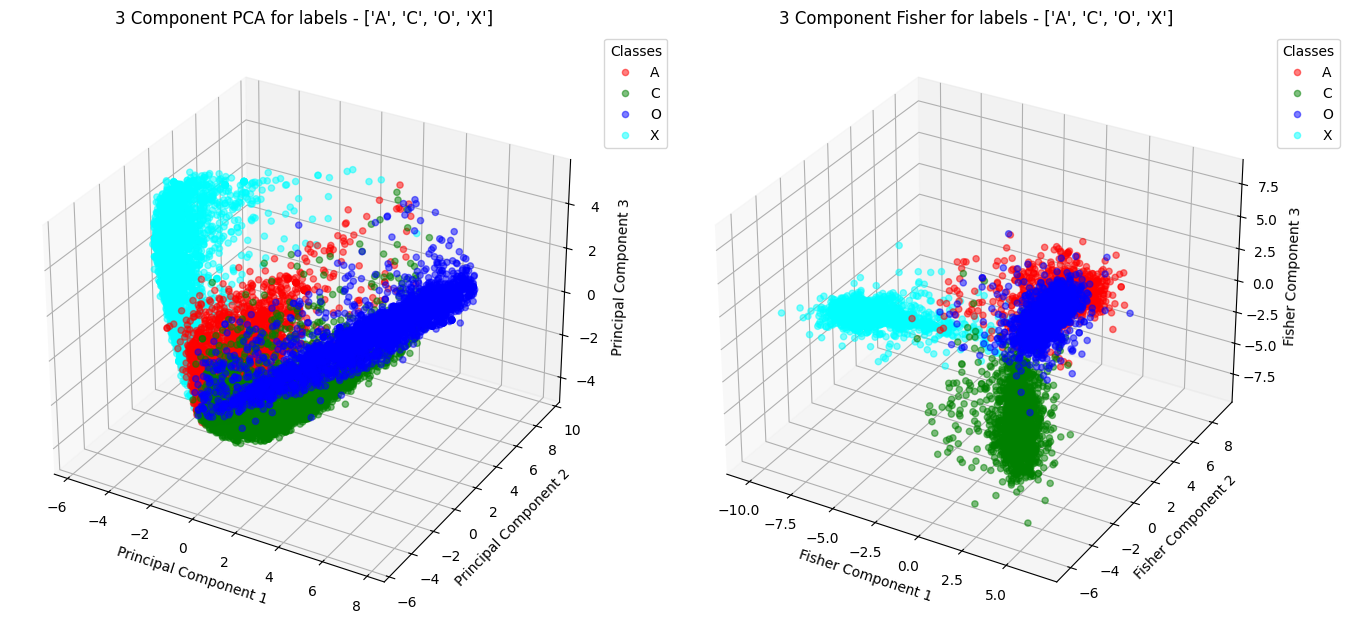

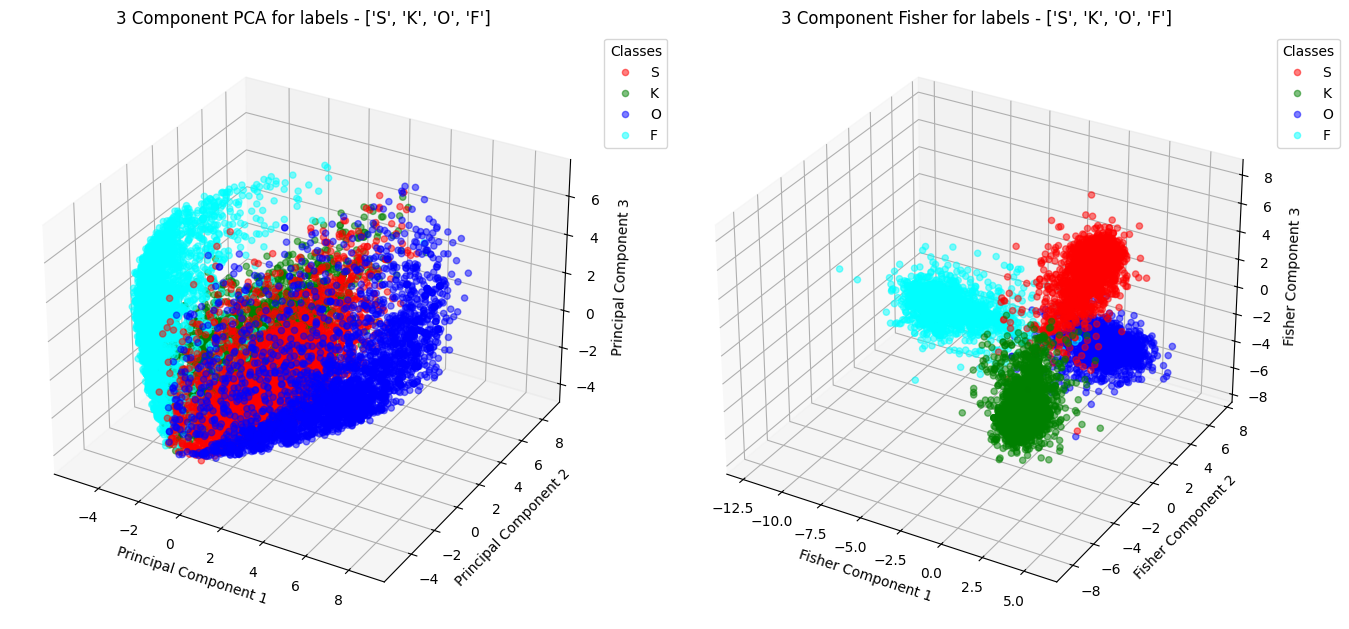

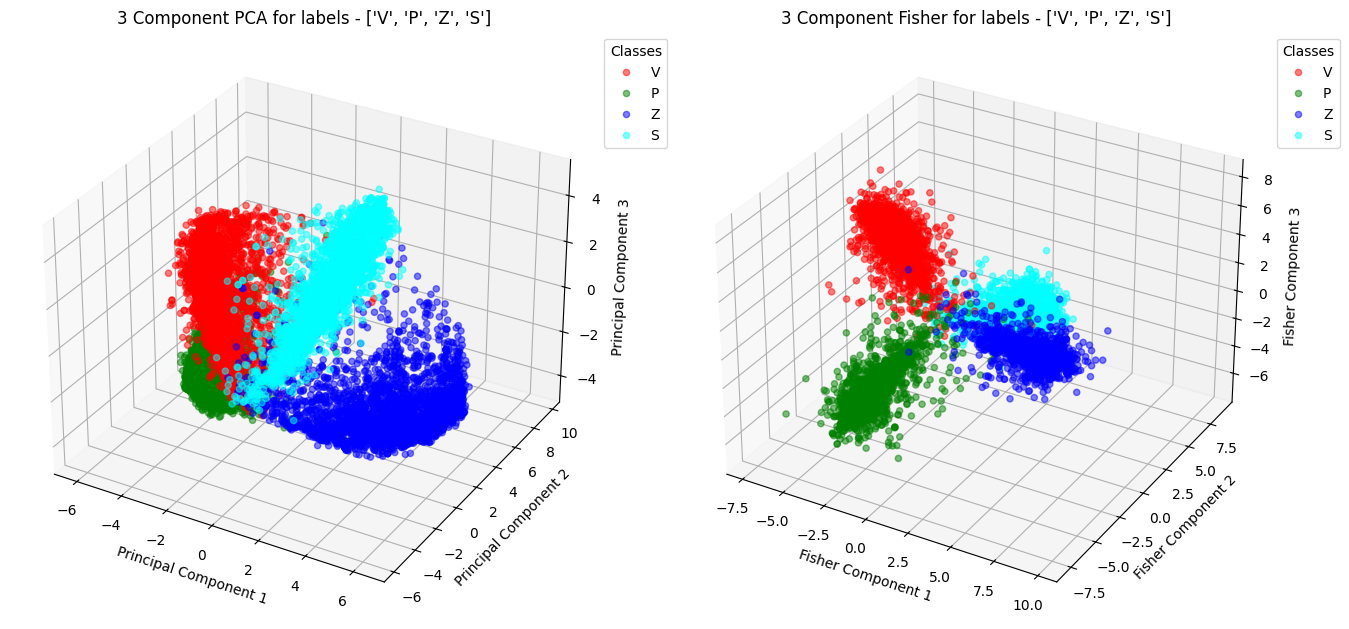

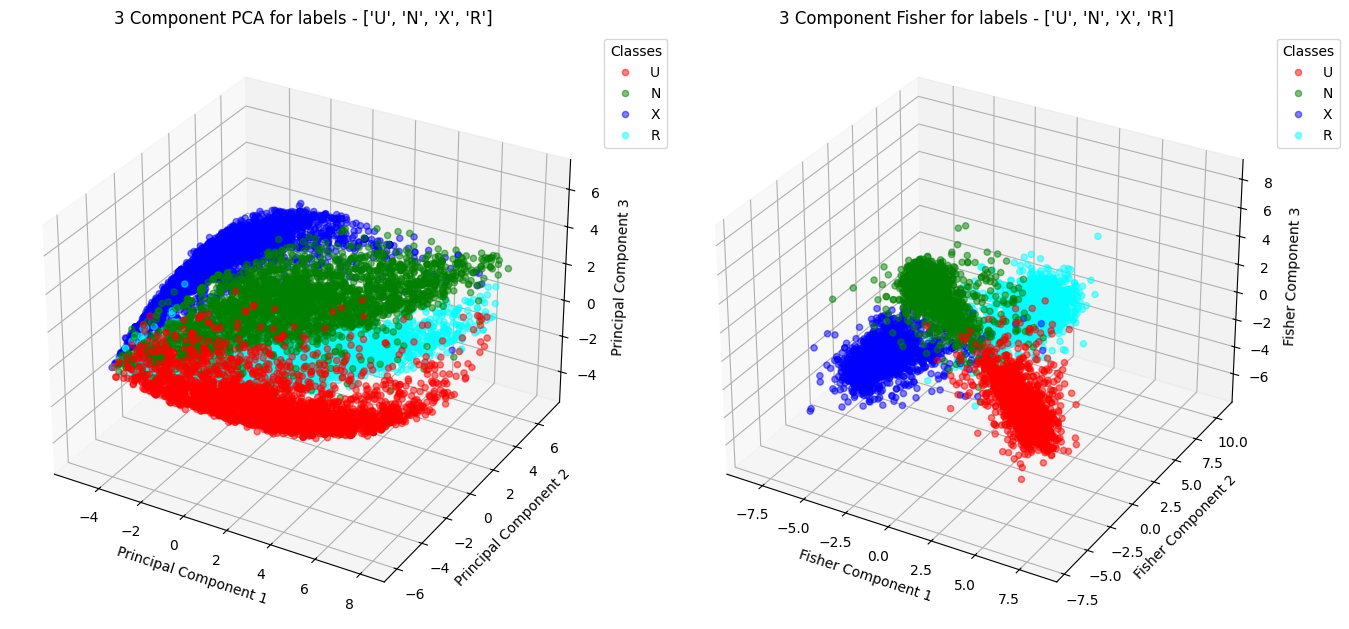

In [131]:
# Using the random.sample function to randomly sample 4 values from the total unique labels in the TMNIST dataset, and populating 3 more class-sets, in addition to the A-C-O-X set
class_sets = (['A','C','O','X'],random.sample(unique_labels,4),random.sample(unique_labels,4),random.sample(unique_labels,4))

# Using a for loop to calculate the PCA & Fisher Projects for all 4 class sets
for i, cl in enumerate(class_sets):
    pca_vs_fisher_3d(norm_tmnist_data, cl)

#### Observations

1. The Principle Component Analysis (PCA) method is a dimensionality reduction technique, which converted the 784 features of the TMNIST dataset to 2 principle components. This has led to the PCA plots having the data points of the different classes overlap with each other, on the 3 dimension graph. This is a function of the PCA technique
2. The Fisher method, using the Linear Discriminant Analysis function, which is a function which performs dimensionality reduction and also acts as a classifier by calculating the fisher components in such a way which leads to the separation of the various classes

### PROBLEM 2: Visualizing all Classes via their Fisher Distance

#### Part 1: FISHER DISTANCE COMPUTATION

In [132]:
# Creating a helper function to facilitate fisher distance computation between each pair of classes
def fisher_dist_comp(norm_tmnist_data):
    ## Define X and y variables
    X, y = norm_tmnist_data.iloc[:, 1:], norm_tmnist_data.iloc[:, 0]

    scores_list = []

    for f_class in y.unique():
        for s_class in y.unique():
            if f_class == s_class: # Not calculating the fisher distance if both the classes are the same
                break
            else:
                # Filtering the dataset based on the selected label(s)
                f_data = norm_tmnist_data[norm_tmnist_data['labels'] == f_class].loc[:,1:]
                s_data = norm_tmnist_data[norm_tmnist_data['labels'] == s_class].loc[:,1:]
                
                # Calculating the number of records for each label
                f_n = f_data.shape[0]
                s_n = s_data.shape[0]

                # For each class, calculating the mean across each feature. Will return a list of values containing mean of each feature (column)
                f_mean = np.mean(f_data,axis=0)
                s_mean = np.mean(s_data,axis=0)


                # Similar to mean, for each class, calculating the variance across each feature
                f_var = np.var(f_data,axis=0)
                s_var = np.var(s_data,axis=0)

                # Using the Fisher Distance formula, as taught in class
                numerator = (f_mean - s_mean) **2
                denominator = (f_n*f_var + s_n*s_var)

                # Since we are working with lists, we calculate the Fisher Discriminant for each feature and perform a sum on all 784 values
                fisher_discriminant = np.sum(numerator / denominator)

                scores_list.append([f_class, s_class, fisher_discriminant])
                
    # Creating a dataframe based on the data collated and for easier output
    fisher_scores = pd.DataFrame(scores_list, columns=['class 1', 'class 2', 'fisher values'])
    fisher_scores.to_csv('./Problem2-FisherDistanceCalcualtion.csv',index=False)


    return fisher_scores

In [133]:
# Executing the driver function to calculate and output the Fisher Distances for each class
fisher_scores = fisher_dist_comp(norm_tmnist_data)

#### Part 2: CLASS VISUALIZATION USING t-SNE/MDS

In [134]:
# Creating a list of 26 unique colors, to be used in the final visualization

# Extracting colors from the 'tab20' colormap
tab20 = plt.get_cmap('tab20')
# Extracting colors from the 'tab20b' colormap
tab20b = plt.get_cmap('tab20b')
colors_26 = [tab20(i) for i in range(tab20.N)] + [tab20b(i) for i in range(tab20b.N)][:6]

In [135]:
# Calling the TSNE function from the sklearn package, to visualize high dimensional data as 2 Dimensional data 
tsne = TSNE(n_components=2, perplexity=40, n_iter=500, random_state=1)
tsne_results = tsne.fit_transform(X) # The tsne_results object contains the 2 components which the tSNE method has reduced the 784 component data into

In [136]:
# Creating the dataframe for easier and efficient manipulation and plotting of data
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE Component 1', 'TSNE Component 2'])
tsne_df['label'] = y # Adding a column for the labels fo each of the component pairs
tsne_df.sort_values(by='label',inplace=True)

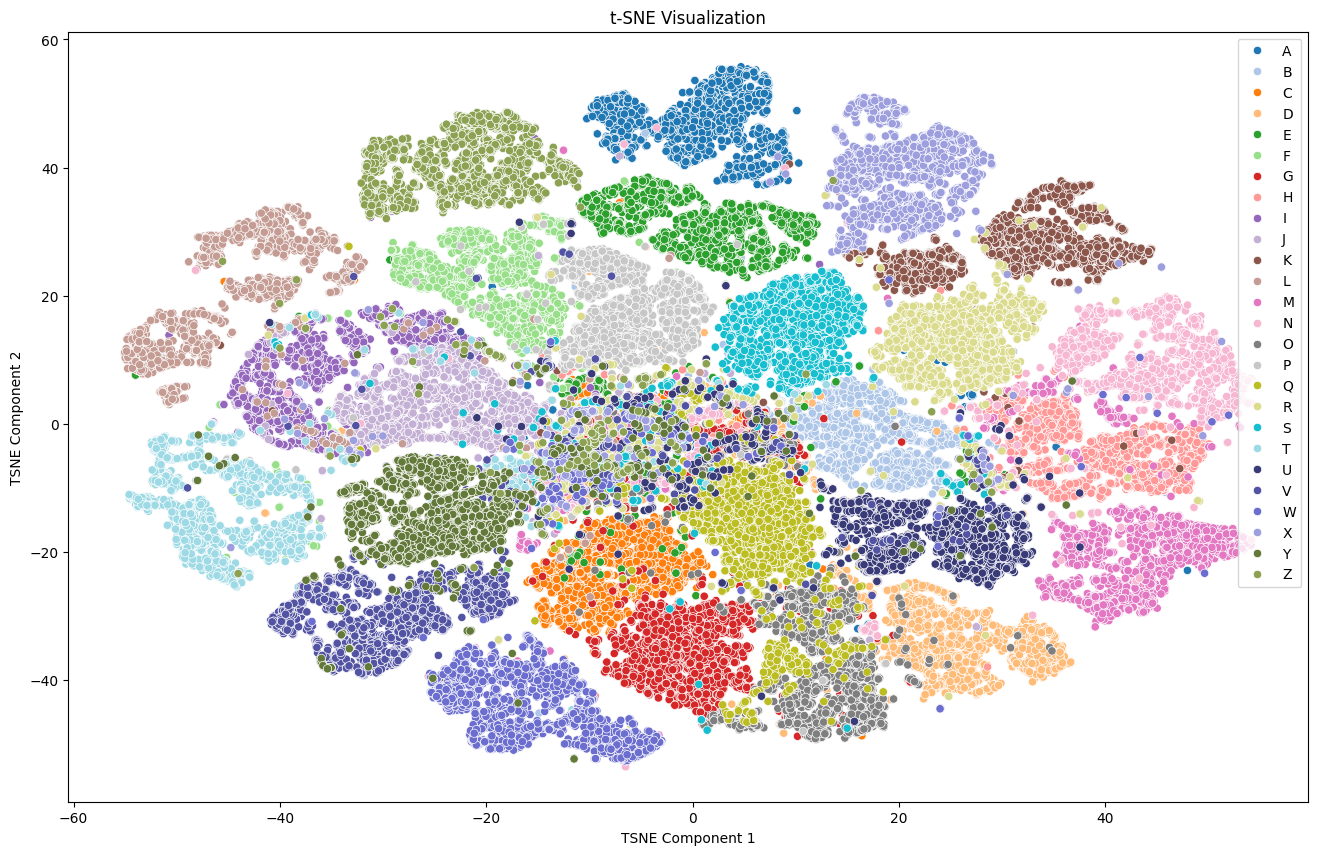

In [137]:
# Plotting the t-SNE output
plt.figure(figsize=(16, 10))

sns.scatterplot(x=tsne_df['TSNE Component 1'],
                y=tsne_df['TSNE Component 2'],
                hue=tsne_df['label'],
                palette=colors_26
                )

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()

#### Observations for Problem 2

1. The Fisher discriminant scores reflect the difference between data points of two classes
2. The tSNe scatter visualization, built on these Fisher discriminant scores, clearly shows various different clusters of data points from the same label.
3. Analysing these clusters, we realise that similar class data points (or similar letters) tend to be nearer to each other. Example - O and D which have the smallest Fisher Score of 0.015, and I and J, having the second smallest Fisher score of 0.018
4. Similarly, dissimilar class data points tend to be farther away from each other. Example - I and H are at the opposite sides of the visualization (farthest away from each other) and have the highest Fisher Score of 0.21

### PROBLEM 3: kNN and Parzen Window classifiers hyper parameter sweeps


#### Part 0: Projecting the 784 dimensional data into 25 Fisher-dimensions, using LDA

In [138]:
# Apply LDA to reduce dimensions from 784 to 25
lda = LDA(n_components=25)
lda_data = lda.fit_transform(X, y)

cols = [f'fisher component {i+1}' for i in range(25)] # Creating an array of column names which will be used during intializing of dataframe

lda_df = pd.DataFrame(lda_data, columns=cols)

In [139]:
# Adding back the labels for each row, in the new, reduced, 25 dimension data
lda_df.insert(0,'labels',y)
lda_df

,labels,fisher component 1,fisher component 2,fisher component 3,fisher component 4,fisher component 5,fisher component 6,fisher component 7,fisher component 8,fisher component 9,...,fisher component 16,fisher component 17,fisher component 18,fisher component 19,fisher component 20,fisher component 21,fisher component 22,fisher component 23,fisher component 24,fisher component 25
0,D,-0.762310,-1.533041,-0.073218,1.001450,0.225250,0.087296,-0.325931,1.594735,-0.117310,...,-1.197867,-1.924588,0.196667,-0.486997,-1.028568,-2.147582,0.075613,-1.060650,1.315535,-1.023802
1,F,2.736058,-0.634779,0.468250,0.752492,0.543006,1.275816,2.137217,0.244311,-0.690312,...,-0.612103,1.798135,2.716245,-1.118387,0.123185,0.854143,1.589658,-0.661544,-0.096370,0.338203
2,J,2.946240,-0.271139,-2.916216,1.683210,-1.839268,1.298424,-3.865425,-3.056084,-0.533645,...,-0.726243,-1.720785,-0.253545,0.310915,1.904184,4.346238,-0.305449,-1.488838,-4.176578,0.689782
3,H,-1.587541,3.297481,3.706615,0.922524,0.503074,-0.453498,0.081759,1.018984,2.821995,...,-0.630328,0.090609,-1.489978,-2.994463,1.554949,-0.821101,-0.317512,1.683196,1.581151,2.640283
4,A,-1.788668,0.299771,-2.100611,3.993402,-0.347681,0.139213,-0.003661,-2.827708,3.124432,...,-0.993619,-3.010721,1.170706,1.104115,0.258360,-0.380571,0.221397,0.431331,-0.130324,-0.994597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,U,-0.521989,-2.543004,2.318904,-2.613080,0.455007,-2.763780,-0.398330,0.203167,-3.329991,...,-1.695123,-0.296717,-1.139880,0.296282,3.362753,0.887066,1.444122,-3.642649,2.677782,-0.521997
74720,R,-2.185447,2.544342,0.376397,1.386135,-1.713392,-0.249318,-0.649694,0.182237,2.202530,...,0.170232,1.869240,0.926408,0.687178,-1.912887,1.056786,0.350205,0.873645,-0.628113,0.405975
74721,N,-0.129871,2.914180,2.906504,-0.058336,1.763563,1.653606,-1.348751,-1.328941,-1.165378,...,-2.047655,0.352771,0.768472,0.880578,-1.250127,0.107185,-0.540483,1.341849,-1.256582,0.435596
74722,J,0.133068,1.181761,-0.434554,-0.228971,-0.460279,-1.087865,0.307627,0.165632,-0.570552,...,0.990493,-0.023060,0.657269,-0.549487,0.724633,1.184566,-0.553174,0.002220,0.084245,-0.675267


In [140]:
## Define X_lda and y_lda variables which represent the features and labels from the 25-dimension, LDA decomposed data (to be further used in problem 4)
X_lda, y_lda = lda_df.iloc[:, 1:].values, lda_df.iloc[:, 0].values

# Split the decomposed data into train and test sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(lda_df.iloc[:,1:], lda_df.iloc[:,0], stratify=lda_df.iloc[:,0], test_size=0.3, random_state=0)

In [141]:
(X_train_lda.shape, X_test_lda.shape)

((52306, 25), (22418, 25))

In [142]:
(y_train_lda.shape, y_test_lda.shape)

((52306,), (22418,))

#### Part 1: Parameter sweep for kNN

In [143]:
# Creating the driver function for the KNN Parameter sweep based on varying values of the # of near neighbors values
def knn_sweep(train = [X_train, y_train], test = [X_test, y_test], K=[1, 3, 5, 7, 9, 11, 13, 15, 17]):
    accuracy_train = []
    accuracy_test = []

    # Create a KNN model instance with n_neighbors=values from the K array given
    for k in K:
        knn = KNeighborsClassifier(n_neighbors = k)

        # Fit the model
        knn.fit(train[0], train[1])

        # Calculating accuracy on both, training & testing datasets
        acc_tr = accuracy_score(train[1], knn.predict(train[0]))
        acc_te = accuracy_score(test[1], knn.predict(test[0]))
        
        # Creating the accuracy score result arrays which will store the accuracy values for each value of k 
        accuracy_test.append(acc_te)
        accuracy_train.append(acc_tr)
    
    # Creating a dataframe based on the data collated and for easier output
    knn_data = pd.DataFrame({'k-value': K, 'train-accuracy': accuracy_train, 'test-accuracy': accuracy_test})
    
    # Outputting the dataframe to a CSV
    knn_data.to_csv('Knn.csv', index=False)

    return knn_data

In [144]:
# Calling the knn_sweep function for parameter sweep across the n_neighbours parameter, giving the resultant train/test accuracy scores for each value of k as output 
# and outputting a CSV with the same information

knn_res = knn_sweep([X_train_lda, y_train_lda],[X_test_lda, y_test_lda])

knn_res

,k-value,train-accuracy,test-accuracy
0,1,1.000000,0.951824
1,3,0.969143,0.946605
2,5,0.961572,0.945490
3,7,0.956506,0.944420
4,9,0.953084,0.943349
5,11,0.950694,0.941832
6,13,0.949165,0.941119
7,15,0.947348,0.940182
8,17,0.946278,0.939245


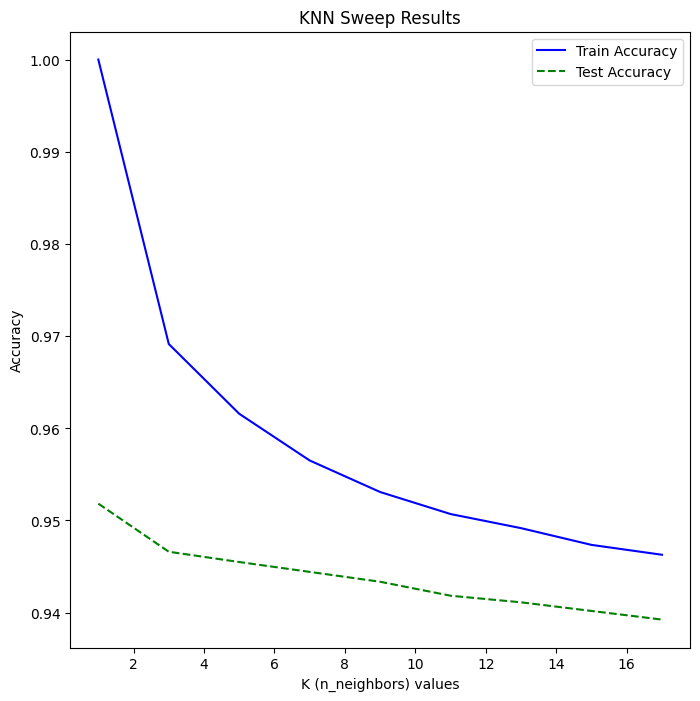

In [145]:
# Plotting the test/train accuracies against the different K values
plt.figure(figsize=(8,8))
plt.plot(knn_res['k-value'], knn_res['train-accuracy'], label='Train Accuracy', color='b', linestyle='-')
plt.plot(knn_res['k-value'], knn_res['test-accuracy'], label='Test Accuracy', color='g', linestyle='--')
plt.xlabel('K (n_neighbors) values')
plt.ylabel('Accuracy')
plt.title('KNN Sweep Results')
plt.legend()
plt.show()

#### Part 2: Parzen window

In [48]:
# Creating a copy of the original 25-dimension dataset, specifically for the Parzen Window problem
lda_df_pzw = lda_df.copy()
lda_df_pzw

,labels,fisher component 1,fisher component 2,fisher component 3,fisher component 4,fisher component 5,fisher component 6,fisher component 7,fisher component 8,fisher component 9,...,fisher component 16,fisher component 17,fisher component 18,fisher component 19,fisher component 20,fisher component 21,fisher component 22,fisher component 23,fisher component 24,fisher component 25
0,D,-0.762310,-1.533041,-0.073218,1.001450,0.225250,0.087296,-0.325931,1.594735,-0.117310,...,-1.197867,-1.924588,0.196667,-0.486997,-1.028568,-2.147582,0.075613,-1.060650,1.315535,-1.023802
1,F,2.736058,-0.634779,0.468250,0.752492,0.543006,1.275816,2.137217,0.244311,-0.690312,...,-0.612103,1.798135,2.716245,-1.118387,0.123185,0.854143,1.589658,-0.661544,-0.096370,0.338203
2,J,2.946240,-0.271139,-2.916216,1.683210,-1.839268,1.298424,-3.865425,-3.056084,-0.533645,...,-0.726243,-1.720785,-0.253545,0.310915,1.904184,4.346238,-0.305449,-1.488838,-4.176578,0.689782
3,H,-1.587541,3.297481,3.706615,0.922524,0.503074,-0.453498,0.081759,1.018984,2.821995,...,-0.630328,0.090609,-1.489978,-2.994463,1.554949,-0.821101,-0.317512,1.683196,1.581151,2.640283
4,A,-1.788668,0.299771,-2.100611,3.993402,-0.347681,0.139213,-0.003661,-2.827708,3.124432,...,-0.993619,-3.010721,1.170706,1.104115,0.258360,-0.380571,0.221397,0.431331,-0.130324,-0.994597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,U,-0.521989,-2.543004,2.318904,-2.613080,0.455007,-2.763780,-0.398330,0.203167,-3.329991,...,-1.695123,-0.296717,-1.139880,0.296282,3.362753,0.887066,1.444122,-3.642649,2.677782,-0.521997
74720,R,-2.185447,2.544342,0.376397,1.386135,-1.713392,-0.249318,-0.649694,0.182237,2.202530,...,0.170232,1.869240,0.926408,0.687178,-1.912887,1.056786,0.350205,0.873645,-0.628113,0.405975
74721,N,-0.129871,2.914180,2.906504,-0.058336,1.763563,1.653606,-1.348751,-1.328941,-1.165378,...,-2.047655,0.352771,0.768472,0.880578,-1.250127,0.107185,-0.540483,1.341849,-1.256582,0.435596
74722,J,0.133068,1.181761,-0.434554,-0.228971,-0.460279,-1.087865,0.307627,0.165632,-0.570552,...,0.990493,-0.023060,0.657269,-0.549487,0.724633,1.184566,-0.553174,0.002220,0.084245,-0.675267


In [49]:
# Label encoding the target or class variable
encoder = LabelEncoder()
y_lda_encoded = encoder.fit_transform(y_lda)
print(y, y_lda_encoded, sep='\n')

['D' 'F' 'J' ... 'N' 'J' 'I']
[ 3  5  9 ... 13  9  8]


In [50]:
# Overwriting the existing labels column with the encoded labels formed in the previous step
lda_df_pzw['labels'] = y_lda_encoded
lda_df_pzw

,labels,fisher component 1,fisher component 2,fisher component 3,fisher component 4,fisher component 5,fisher component 6,fisher component 7,fisher component 8,fisher component 9,...,fisher component 16,fisher component 17,fisher component 18,fisher component 19,fisher component 20,fisher component 21,fisher component 22,fisher component 23,fisher component 24,fisher component 25
0,3,-0.762310,-1.533041,-0.073218,1.001450,0.225250,0.087296,-0.325931,1.594735,-0.117310,...,-1.197867,-1.924588,0.196667,-0.486997,-1.028568,-2.147582,0.075613,-1.060650,1.315535,-1.023802
1,5,2.736058,-0.634779,0.468250,0.752492,0.543006,1.275816,2.137217,0.244311,-0.690312,...,-0.612103,1.798135,2.716245,-1.118387,0.123185,0.854143,1.589658,-0.661544,-0.096370,0.338203
2,9,2.946240,-0.271139,-2.916216,1.683210,-1.839268,1.298424,-3.865425,-3.056084,-0.533645,...,-0.726243,-1.720785,-0.253545,0.310915,1.904184,4.346238,-0.305449,-1.488838,-4.176578,0.689782
3,7,-1.587541,3.297481,3.706615,0.922524,0.503074,-0.453498,0.081759,1.018984,2.821995,...,-0.630328,0.090609,-1.489978,-2.994463,1.554949,-0.821101,-0.317512,1.683196,1.581151,2.640283
4,0,-1.788668,0.299771,-2.100611,3.993402,-0.347681,0.139213,-0.003661,-2.827708,3.124432,...,-0.993619,-3.010721,1.170706,1.104115,0.258360,-0.380571,0.221397,0.431331,-0.130324,-0.994597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,20,-0.521989,-2.543004,2.318904,-2.613080,0.455007,-2.763780,-0.398330,0.203167,-3.329991,...,-1.695123,-0.296717,-1.139880,0.296282,3.362753,0.887066,1.444122,-3.642649,2.677782,-0.521997
74720,17,-2.185447,2.544342,0.376397,1.386135,-1.713392,-0.249318,-0.649694,0.182237,2.202530,...,0.170232,1.869240,0.926408,0.687178,-1.912887,1.056786,0.350205,0.873645,-0.628113,0.405975
74721,13,-0.129871,2.914180,2.906504,-0.058336,1.763563,1.653606,-1.348751,-1.328941,-1.165378,...,-2.047655,0.352771,0.768472,0.880578,-1.250127,0.107185,-0.540483,1.341849,-1.256582,0.435596
74722,9,0.133068,1.181761,-0.434554,-0.228971,-0.460279,-1.087865,0.307627,0.165632,-0.570552,...,0.990493,-0.023060,0.657269,-0.549487,0.724633,1.184566,-0.553174,0.002220,0.084245,-0.675267


In [51]:
## Define X and y variables based on the new dataset with the encoded target labels
X_lda_pzw, y_lda_pzw = lda_df_pzw.iloc[:, 1:].values, lda_df_pzw.iloc[:, 0].values

# Split the decomposed data into train and test sets
X_train_lda_pzw, X_test_lda_pzw, y_train_lda_pzw, y_test_lda_pzw = train_test_split(lda_df_pzw.iloc[:,1:], lda_df_pzw.iloc[:,0], stratify=lda_df_pzw.iloc[:,0], test_size=0.3, random_state=0)

In [52]:
(X_train_lda_pzw.shape, X_test_lda_pzw.shape)

((52306, 25), (22418, 25))

In [53]:
(y_train_lda_pzw.shape, y_test_lda_pzw.shape)

((52306,), (22418,))

In [77]:
# Creating the driver function for the Parzen Window Parameter sweep based on varying values of sigma (the distance of the window or kernel)
def parzen_sweep(train = (X_train, y_train), test = (X_test, y_test), sigma=[0.1, 0.5, 1, 1.5, 2, 3, 4, 6, 8, 10]):
    accuracy_train = []
    accuracy_test = []

    # Looping through each value of sigma
    for s in sigma:
        # print(f'For Sigma - {s}')
        train_pred = []
        test_pred = []

        # Predictions based on the training data
        for x in train[0].values:
            # print(x)
            # print(train[0])
            distance_vecs = np.linalg.norm(train[0].values - x, axis=1)
            weights = norm.pdf(distance_vecs / s)
            labels = np.argmax(np.bincount(train[1], weights=weights))
            train_pred.append(labels)

        # Predictions based on the testing data
        test_pred = []
        for x in test[0].values:
            distance_vecs = np.linalg.norm(test[0].values - x, axis=1)
            weights = norm.pdf(distance_vecs / s)
            labels = np.argmax(np.bincount(test[1], weights=weights))
            test_pred.append(labels)


        # Calculating the true accuracy score on both, trainging & testing datasets, by comparing the actual target values with the predicted target values 
        acc_tr = accuracy_score(train[1], train_pred)
        acc_te = accuracy_score(test[1], test_pred)
        
        # Creating the accuracy score result arrays which will store the accuracy values for each value of sigma
        accuracy_test.append(acc_te)
        accuracy_train.append(acc_tr)
    
    # Creating a dataframe based on the data collated and for easier output
    pzw_data = pd.DataFrame({'sigma': sigma, 'train-accuracy': accuracy_train, 'test-accuracy': accuracy_test})

    # Outputting the dataframe to a CSV
    pzw_data.to_csv('parzen.csv', index=False)

    return pzw_data

In [78]:
# Calling the parzen_sweep function for parameter sweep across the default list of sigma parameter values

pzw_res = parzen_sweep((X_train_lda_pzw, y_train_lda_pzw),(X_test_lda_pzw, y_test_lda_pzw))

pzw_res

For Sigma - 0.1
For Sigma - 0.5
For Sigma - 1
For Sigma - 1.5
For Sigma - 2
For Sigma - 3
For Sigma - 4
For Sigma - 6
For Sigma - 8
For Sigma - 10


,sigma,train-accuracy,test-accuracy
0,0.1,1.000000,0.999955
1,0.5,0.999943,0.999911
2,1.0,0.996119,0.997770
3,1.5,0.975739,0.983228
4,2.0,0.940733,0.948390
5,3.0,0.901139,0.900080
6,4.0,0.890204,0.888482
7,6.0,0.883398,0.881256
8,8.0,0.880817,0.878981
9,10.0,0.879765,0.878000


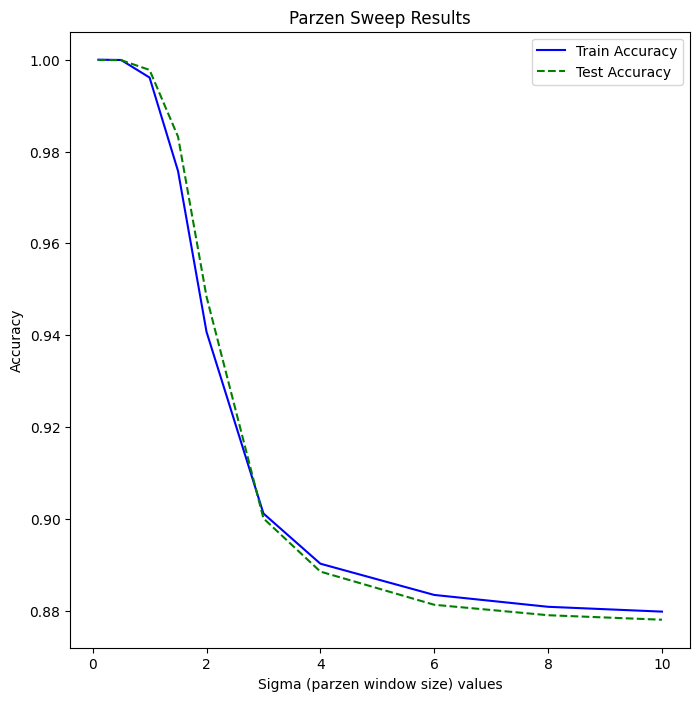

In [79]:
# Plotting the test/train accuracies against the different sigma values
plt.figure(figsize=(8,8))
plt.plot(pzw_res['sigma'], pzw_res['train-accuracy'], label='Train Accuracy', color='b', linestyle='-')
plt.plot(pzw_res['sigma'], pzw_res['test-accuracy'], label='Test Accuracy', color='g', linestyle='--')
plt.xlabel('Sigma (parzen window size) values')
plt.ylabel('Accuracy')
plt.title('Parzen Sweep Results')
plt.legend()
plt.show()

#### Observations for Problem 3

1. The K nearest neighbors algorithm is a clustering algorithm which, clusters similar data points together, based on an optimal value of the # of nearest neighbors (K) to be used for cluster creation. We looked at the parameter sweep of the KNN model on the TMNIST dataset for various values of K and could confirm that the most optimal value of the # of nearest neighbors is 1 for this dataset
2. The Training and test accuracy scores show a high difference, hence, leading us to believe that the clustering model created is not as good as the Parzen Window model for clustering the given dataset 
3. As K increases, both the train and test accuracy scores start falling off. This points out the obvious trade-off of having higher values of K (relatively lower computation) and accuracy in cluster creation

4. The Parzen window algorithm is also for clustering and is based on the sigma value, which indicates the size of the window or kernel to capture neighbors. The parzen window model states that the optimal value of sigma for the given dataset is anywhere from 0.1 and 1, given the extremely high value of accuracy scores for bot the test and training data (~99%)
5. The Parzen window test and train accuracies are very close to each other and we can say that the Parzen Window method does a good job of creating a model of clustering for the given dataset. However, with sigma values greater than 3, the testing data tends accuraacy falls off more than the training accuracy  

### PROBLEM 4: Perceptron vs. Logistic Regression

#### Coding the Perceptron model, based on the dimensionally reduced, 25-component data

In [147]:
lda_df

,labels,fisher component 1,fisher component 2,fisher component 3,fisher component 4,fisher component 5,fisher component 6,fisher component 7,fisher component 8,fisher component 9,...,fisher component 16,fisher component 17,fisher component 18,fisher component 19,fisher component 20,fisher component 21,fisher component 22,fisher component 23,fisher component 24,fisher component 25
0,D,-0.762310,-1.533041,-0.073218,1.001450,0.225250,0.087296,-0.325931,1.594735,-0.117310,...,-1.197867,-1.924588,0.196667,-0.486997,-1.028568,-2.147582,0.075613,-1.060650,1.315535,-1.023802
1,F,2.736058,-0.634779,0.468250,0.752492,0.543006,1.275816,2.137217,0.244311,-0.690312,...,-0.612103,1.798135,2.716245,-1.118387,0.123185,0.854143,1.589658,-0.661544,-0.096370,0.338203
2,J,2.946240,-0.271139,-2.916216,1.683210,-1.839268,1.298424,-3.865425,-3.056084,-0.533645,...,-0.726243,-1.720785,-0.253545,0.310915,1.904184,4.346238,-0.305449,-1.488838,-4.176578,0.689782
3,H,-1.587541,3.297481,3.706615,0.922524,0.503074,-0.453498,0.081759,1.018984,2.821995,...,-0.630328,0.090609,-1.489978,-2.994463,1.554949,-0.821101,-0.317512,1.683196,1.581151,2.640283
4,A,-1.788668,0.299771,-2.100611,3.993402,-0.347681,0.139213,-0.003661,-2.827708,3.124432,...,-0.993619,-3.010721,1.170706,1.104115,0.258360,-0.380571,0.221397,0.431331,-0.130324,-0.994597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,U,-0.521989,-2.543004,2.318904,-2.613080,0.455007,-2.763780,-0.398330,0.203167,-3.329991,...,-1.695123,-0.296717,-1.139880,0.296282,3.362753,0.887066,1.444122,-3.642649,2.677782,-0.521997
74720,R,-2.185447,2.544342,0.376397,1.386135,-1.713392,-0.249318,-0.649694,0.182237,2.202530,...,0.170232,1.869240,0.926408,0.687178,-1.912887,1.056786,0.350205,0.873645,-0.628113,0.405975
74721,N,-0.129871,2.914180,2.906504,-0.058336,1.763563,1.653606,-1.348751,-1.328941,-1.165378,...,-2.047655,0.352771,0.768472,0.880578,-1.250127,0.107185,-0.540483,1.341849,-1.256582,0.435596
74722,J,0.133068,1.181761,-0.434554,-0.228971,-0.460279,-1.087865,0.307627,0.165632,-0.570552,...,0.990493,-0.023060,0.657269,-0.549487,0.724633,1.184566,-0.553174,0.002220,0.084245,-0.675267


In [148]:
# Picking any two classes from the unique labels set, at random, for use in the Perceptron & Logistic Regression Models
classes = random.sample(unique_labels, 2)
print(classes)

['J', 'E']


In [149]:
# Creating a filtered dataset to be used in both models of problem 4, based on the two randomly selected classes in the previous step
lda_df_prob4 = lda_df[lda_df['labels'].isin(classes)]
lda_df_prob4

,labels,fisher component 1,fisher component 2,fisher component 3,fisher component 4,fisher component 5,fisher component 6,fisher component 7,fisher component 8,fisher component 9,...,fisher component 16,fisher component 17,fisher component 18,fisher component 19,fisher component 20,fisher component 21,fisher component 22,fisher component 23,fisher component 24,fisher component 25
2,J,2.946240,-0.271139,-2.916216,1.683210,-1.839268,1.298424,-3.865425,-3.056084,-0.533645,...,-0.726243,-1.720785,-0.253545,0.310915,1.904184,4.346238,-0.305449,-1.488838,-4.176578,0.689782
11,J,2.166105,1.643451,-4.574271,2.925996,-2.851454,2.254163,-3.204921,-1.712286,1.765725,...,0.667341,0.649371,1.500177,-2.705589,0.554581,0.332412,-0.566481,1.233349,-1.147269,0.893988
23,E,-2.225783,1.038706,0.465814,-3.415587,0.690753,0.856135,2.415152,-0.071722,1.964635,...,-0.104642,-0.974944,-1.967540,-2.176554,0.084290,-0.285694,-1.173141,-0.017239,-1.901706,-1.688481
39,E,-2.774990,-0.300731,-2.470123,-2.004875,-1.359508,0.476942,2.661814,1.867546,2.202332,...,-0.769798,-1.020730,0.179755,2.251077,-2.109243,-1.496466,0.177641,-0.619005,-1.176651,2.388559
70,J,2.318500,0.006781,-1.447772,-0.053817,-1.145737,0.373424,-2.181288,-1.705630,0.568216,...,-0.950702,0.650520,-0.539275,0.375060,0.828971,1.083624,-0.164961,-0.588265,-0.324430,-0.625593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74602,J,0.213587,-1.135427,-2.137428,0.872881,-0.755612,-0.834177,-1.738698,-3.940560,0.961904,...,-0.274317,0.847064,-0.465696,2.069801,0.718196,2.697053,1.131590,-1.231652,-4.414844,0.683705
74675,E,-2.039655,-0.830452,-1.636697,-2.281695,1.286515,3.793214,2.783483,2.462239,1.665060,...,-1.104060,-0.805191,-2.980567,-2.004727,-1.182593,-1.177027,-2.153710,-0.428414,0.414008,-0.232147
74687,E,-3.020010,-0.553109,-1.392679,-2.568890,-0.879885,1.866191,1.598170,3.268214,2.560637,...,-1.125031,-2.287828,-3.030457,0.553082,-1.418786,-0.482310,-1.867359,-0.476688,-1.156759,0.480723
74689,E,-2.702056,-1.307797,-1.096741,-2.882141,-1.843884,2.531630,2.093837,2.344841,2.590130,...,-0.099734,-2.320752,-1.903699,1.234644,0.255142,-0.674390,0.117735,-0.529337,-0.268856,0.589529


In [150]:
# Split the decomposed data into train and test sets
X_train_lda_prob4, X_test_lda_prob4, y_train_lda_prob4, y_test_lda_prob4 = train_test_split(lda_df_prob4.iloc[:,1:], lda_df_prob4.iloc[:,0], stratify=lda_df_prob4.iloc[:,0], test_size=0.3, random_state=0)

In [151]:
# Creating a function for defining the perceptron model and generating the final csv with the train/test accuracy scores, across the 100 randomized runs
def perceptron_model(train = [X_train, y_train], test = [X_test, y_test], classes=['A', 'C']):
    accuracy_train = []
    accuracy_test = []
        
    for i in range(100):
        # Initialize the perceptron
        perceptron = Perceptron(random_state=i)

        # Training the perceptron model
        perceptron.fit(X_train_lda_prob4, y_train_lda_prob4)

        # Making predictions based on the fitted Perceptron Model
        y_pred_train = perceptron.predict(train[0])
        y_pred_test = perceptron.predict(test[0])

        # Evaluating the model by calculating accuracy on both, training & testing datasets
        acc_tr = accuracy_score(train[1], y_pred_train)
        acc_te = accuracy_score(test[1], y_pred_test)

        accuracy_train.append(acc_tr)
        accuracy_test.append(acc_te)
    
    # Creating a dataframe based on the data collated and for easier output
    perceptron_df = pd.DataFrame({
        'run': list(range(100)),
        'train-accuracy': accuracy_train,
        'test-accuracy': accuracy_test
    })

    # Outputting the dataframe to a CSV
    perceptron_df.to_csv(f'perceptron_{classes[0]}_{classes[1]}.csv', index=False)

    return perceptron_df

In [152]:
# Running the perceptron model for the 100 randomized runs with the randomly selected 2 classes 
# perceptron_res = perceptron_model([X_train_lda_prob4, y_train_lda_prob4], [X_test_lda_prob4, y_test_lda_prob4]) # Execute this code to get the perceptron model for the A & C classes
perceptron_res = perceptron_model([X_train_lda_prob4, y_train_lda_prob4], [X_test_lda_prob4, y_test_lda_prob4], classes=classes)

perceptron_res # Printing the results of each run

,run,train-accuracy,test-accuracy
0,0,0.990803,0.990725
1,1,0.992543,0.991304
2,2,0.986329,0.986667
3,3,0.990057,0.990725
4,4,0.992294,0.990145
...,...,...,...
95,95,0.987323,0.988986
96,96,0.992294,0.992464
97,97,0.991797,0.991884
98,98,0.989560,0.987826


#### Coding the Logistic Regression model, based on the dimensionally reduced, 25-component data

In [153]:
# Creating a function for defining the logistic regression model and generating the final csv with the train/test accuracy scores, across the 100 randomized runs
def logistic_model(train = [X_train, y_train], test = [X_test, y_test], classes=['A', 'C']):
    accuracy_train = []
    accuracy_test = []
        
    for i in range(100):
        # Initialize the LogisticRegression Model using the liblinear solver, so as to use the random_state parameter for randomized runs
        logistic = LogisticRegression(solver='liblinear', random_state=i)

        # Training the Logisic Regression Model
        logistic.fit(X_train_lda_prob4, y_train_lda_prob4)

        # Making predictions based on the fitted Logistic Regression Model
        y_pred_train = logistic.predict(train[0])
        y_pred_test = logistic.predict(test[0])

        # Evaluating the model by calculating accuracy on both, training & testing datasets
        acc_tr = accuracy_score(train[1], y_pred_train)
        acc_te = accuracy_score(test[1], y_pred_test)

        accuracy_train.append(acc_tr)
        accuracy_test.append(acc_te)
    
    logistic_df = pd.DataFrame({
        'run': list(range(100)),
        'train-accuracy': accuracy_train,
        'test-accuracy': accuracy_test
    })

    logistic_df.to_csv(f'logistic_{classes[0]}_{classes[1]}.csv', index=False)

    return logistic_df

In [154]:
# Running the Logistic Regression model for the 100 randomized runs with the randomly selected 2 classes 
# perceptron_res = perceptron_model([X_train_lda_prob4, y_train_lda_prob4], [X_test_lda_prob4, y_test_lda_prob4]) # Execute this code to get the Logistic Regression model for the A & C classes
logistic_res = logistic_model([X_train_lda_prob4, y_train_lda_prob4], [X_test_lda_prob4, y_test_lda_prob4], classes=classes)
logistic_res # Printing the results of each run

,run,train-accuracy,test-accuracy
0,0,0.993537,0.991884
1,1,0.993537,0.991884
2,2,0.993537,0.991884
3,3,0.993537,0.991884
4,4,0.993537,0.991884
...,...,...,...
95,95,0.993537,0.991884
96,96,0.993537,0.991884
97,97,0.993537,0.991884
98,98,0.993537,0.991884


#### Results & Observations for Problem 4

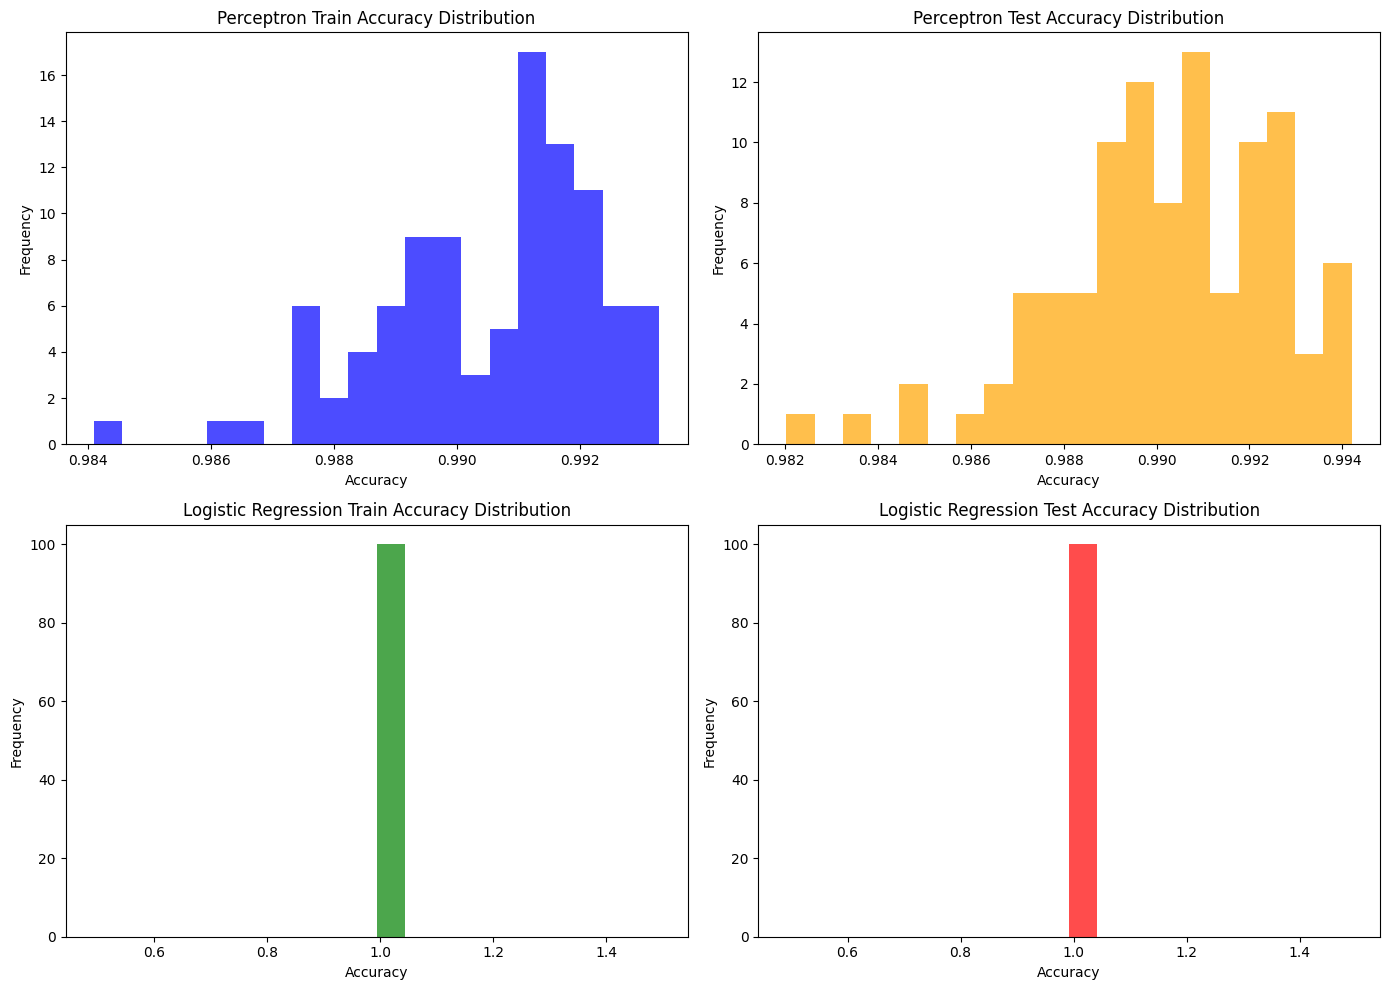

In [155]:
# Plotting the results of each run of perceptron & Logistic Regressions in histograms

plt.figure(figsize=(14, 10))
 
plt.subplot(2, 2, 1)
plt.hist(perceptron_res['train-accuracy'], bins=20, alpha=0.5, color='blue')
plt.title('Perceptron Train Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
 
plt.subplot(2, 2, 2)
plt.hist(perceptron_res['test-accuracy'], bins=20, alpha=0.5, color='orange')
plt.title('Perceptron Test Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
 
plt.subplot(2, 2, 3)
plt.hist(logistic_res['train-accuracy'], bins=20, alpha=0.5, color='green')
plt.title('Logistic Regression Train Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
 
plt.subplot(2, 2, 4)
plt.hist(logistic_res['test-accuracy'], bins=20, alpha=0.5, color='red')
plt.title('Logistic Regression Test Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [156]:
print(f'The mean train accuracy for 100 runs of Perception = {np.mean(perceptron_res["train-accuracy"]):.2%}')
print(f'The mean test accuracy for 100 runs of Perception = {np.mean(perceptron_res["test-accuracy"]):.2%}')
print(f'The mean train accuracy for 100 runs of Logistic Regression = {np.mean(logistic_res["train-accuracy"]):.2%}')
print(f'The mean test accuracy for 100 runs of Logistic Regression = {np.mean(logistic_res["test-accuracy"]):.2%}')

The mean train accuracy for 100 runs of Perception = 99.05%
The mean test accuracy for 100 runs of Perception = 99.01%
The mean train accuracy for 100 runs of Logistic Regression = 99.35%
The mean test accuracy for 100 runs of Logistic Regression = 99.19%


#### Observations for Problem 4

1. The mean train and test accuracy for the Perceptron model is ~99.0%
2. This is verified by the histogram which plots the accuracy results of the 100 random runs performed, with a significant runs given accuracy scores in a range of 0.988 to 0.994

3. The mean train and test accuracy for the Logistic Regression Model is 99.3% and 99.2%, respectively.
4. This is verified by the histogram results.

This means that both these models are very good at predicting data for the given TMNIST dataset 